<h1 style="color: #87CEEB;">Assignment-1</h1>
<h2 style="color: red;">Part - A</h2>

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("landslide_data_original.csv")
df2=pd.read_csv("landslide_data_miss.csv")
temp=df['temperature'].tolist()
temp.sort()
temp2=df2['temperature']
print(f"There are {temp2.isnull().sum()} missing values in missing dataset.\n So Dropped Them.")
temp2=temp2.dropna()
temp2=temp2.tolist()
temp2.sort()

There are 66 missing values in missing dataset.
 So Dropped Them.


In [2]:
#Mean
def sumof(l1):
    s=0
    for i in l1:
        s+=i
    return s
mean1=round((sumof(temp)/len(temp)),2)

mean2=round(sumof(temp2)/len(temp2),2)

In [3]:
#Minimum
def minof(l1):
    min=10000
    for i in l1:
        if i<min:
            min=i
    return min

mini1=round(minof(temp),2)
mini2=round(minof(temp2),2)

In [4]:
#Maximum
def maxof(l1):
    max=-10000
    for i in l1:
        if i>max:
            max=i
    return max

maxi1=round(maxof(temp),2)
maxi2=round(maxof(temp2),2)


In [5]:
#Median

median1=round(temp[int((len(temp)+1)/2)],2)
median2=round(temp2[int((len(temp2)+1)/2)],2)

In [6]:
#Standard Deviation
def stnd(l1,mean):
    sigma = 0
    for i in l1:
        sigma += ((i - mean) ** 2)
    std = np.sqrt(sigma / len(l1))
    return std

In [7]:
std1=round(stnd(temp,mean1),2)
std2=round(stnd(temp2,mean2),2)

In [8]:
print(f'The statistical measures of Temperature attribute of Complete Data are:')
print(f"Mean: {mean1}")
print(f"Minimum: {mini1}")
print(f'Maximum: {maxi1}')
print(f"Since the no of terms is {len(temp)} in complete data which is odd.")
print(f"Median: {median1}")
print(f"Standard Deviation: {std1}")

The statistical measures of Temperature attribute of Complete Data are:
Mean: 21.21
Minimum: 7.67
Maximum: 31.38
Since the no of terms is 945 in complete data which is odd.
Median: 22.27
Standard Deviation: 4.35


In [9]:
print(f'The statistical measures of Temperature attribute of Incomplete Data are:')
print(f"Mean: {mean2}")
print(f"Minimum: {mini2}")
print(f'Maximum: {maxi2}')
print(f"Since the no of terms is {len(temp2)} in missing data which is odd.")
print(f"Median: {median2}")
print(f"Standard Deviation: {std2}")

The statistical measures of Temperature attribute of Incomplete Data are:
Mean: 21.08
Minimum: 7.67
Maximum: 31.38
Since the no of terms is 879 in missing data which is odd.
Median: 22.11
Standard Deviation: 4.4


<h2 style="color: Red;">Part-B</h2>

In [10]:
df=pd.read_csv("landslide_data_original.csv")
temp=df['temperature'].tolist()
humi=df['humidity'].tolist()
press=df['pressure'].tolist()
rain=df['rain'].tolist()
lavg=df['lightavg'].tolist()
limax=df['lightmax'].tolist()
mois=df['moisture'].tolist()

In [11]:
def mul(l1,l2):
    l3=[]
    for i in range(0,max(len(l1),len(l2))):
        a=l1[i]*l2[i]
        l3.append(a)
    return l3

In [12]:
def crr(para1, para2):
    l1 = []
    l2 = []
    l3 = []
    l4 = []
    mean1 = sum(para1) / len(para1)
    mean2 = sum(para2) / len(para2)
    for i in para1:
        l1.append(i - mean1)
        l3.append((i - mean1) ** 2)
    for j in para2:
        l2.append(j - mean2)
        l4.append((j - mean2) ** 2)

    num = sum(mul(l1, l2))
    sum1 = sum(l3)
    sum2 = sum(l4)
    deno = np.sqrt(sum1 * sum2)
    return round(num / deno, 2)

In [13]:
dict = {'' : ['Temperature', 'Humidity', 'Pressure', 'Rain','Lightavg',"LightMax","Moisture"],
        'Temperature' : [crr(temp,temp),crr(temp,humi),crr(press,temp),crr(rain,temp),crr(lavg,temp),crr(limax,temp),crr(mois,temp)],
        'Humidity' : [crr(humi,temp), crr(humi,humi), crr(humi,press), crr(humi,rain),crr(humi,lavg),crr(humi,limax),crr(humi,mois)],
       'Pressure':[crr(press,temp),crr(press,humi),crr(press,press),crr(press,rain),crr(press,lavg),crr(press,limax),crr(press,mois)],    
       'Rain':[crr(rain,temp),crr(rain,humi),crr(rain,press),crr(rain,rain),crr(rain,lavg),crr(rain,limax),crr(rain,mois)],
       'LightAvg':[crr(lavg,temp),crr(lavg,humi),crr(lavg,press),crr(lavg,rain),crr(lavg,lavg),crr(lavg,limax),crr(lavg,mois)] ,
        'LightMax':[crr(limax,temp),crr(limax,humi),crr(limax,press),crr(limax,rain),crr(limax,lavg),crr(limax,limax),crr(limax,mois)],
       'Moisture':[crr(mois,temp),crr(mois,humi),crr(mois,press),crr(mois,rain),crr(mois,lavg),crr(mois,limax),crr(mois,mois)] 
       }

In [14]:
df1 = pd.DataFrame(dict)
df1=df1.set_index("")
df1

,Temperature,Humidity,Pressure,Rain,LightAvg,LightMax,Moisture
,,,,,,,
Temperature,1.00,0.40,-0.18,-0.11,-0.18,-0.15,0.08
Humidity,0.40,1.00,-0.11,-0.43,-0.26,-0.24,-0.00
Pressure,-0.18,-0.11,1.00,0.07,0.08,0.10,-0.04
Rain,-0.11,-0.43,0.07,1.00,0.53,0.31,0.43
Lightavg,-0.18,-0.26,0.08,0.53,1.00,0.62,0.34
LightMax,-0.15,-0.24,0.10,0.31,0.62,1.00,0.01
Moisture,0.08,-0.00,-0.04,0.43,0.34,0.01,1.00


In [15]:
print(f"The redundant attribute w.r.t Light avg is Light Max as it has a strong correlation of {crr(limax,lavg)} .")

The redundant attribute w.r.t Light avg is Light Max as it has a strong correlation of 0.62 .


<h2 style="color: Red;">Part-C</h2>

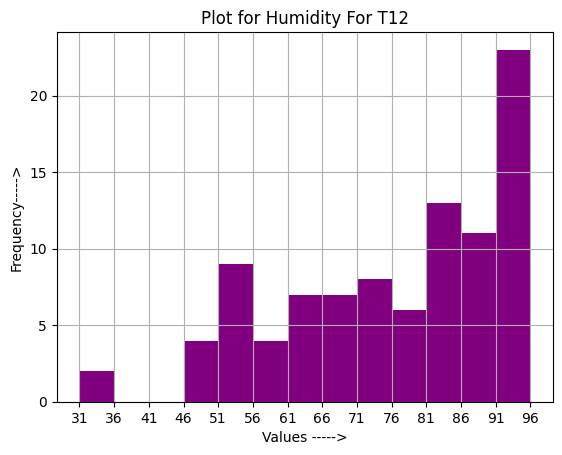

In [16]:
import matplotlib.pyplot as plt
df=pd.read_csv("landslide_data_original.csv")
newdf=df['stationid']=='t12'
reqd=df[newdf]['humidity']
bin=np.arange(reqd.min(),reqd.max(),5)

plt.hist(reqd,bins=bin,color='purple')
plt.xticks(bin)
plt.xlabel("Values ----->")
plt.ylabel("Frequency----->")
plt.title("Plot for Humidity For T12")
plt.grid('b')
plt.show()